## Load Data & Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston 
boston = load_boston() 
X = boston.data 
y = boston.target 

In [3]:
print(X.shape)
X[0,:]

(506, 13)


array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [4]:
#Splitting into Train & Test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [5]:
# Train the model
model = GradientBoostingRegressor()
model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [6]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE Score : ',mse)

MSE Score :  7.802767150177145


In [7]:
def plot_graph(train,test,para,string):
    fig = plt.figure(figsize=(6,3))
    x = list(train.keys())
    plt.plot(x,list(train.values()),label='Train '+ string)
    plt.plot(x,list(test.values()),label='Test '+ string)
    plt.ylabel(string+' Score')
    plt.xlabel(para)
    plt.legend()
    plt.show()

## Key Parameters
* Tree Specific Parameters :
    * min_samples_split
    * min_samples_leaf
    * max_depth
    * max_features
    * max_leaf_nodes <br>
* Boosting Parameters :
    * learning_rate
    * n_estimators
    * subsample <br>
* Others Parameters :
    * loss
    * criterion

## Tree Specific Parameters

### min_samples_split
- min_samples_split represents the minimum number of samples required to split an internal node.
- This can vary between considering at least one sample at each node to considering all of the samples at each node.
- Used to control over-fitting. Too high values can lead to under-fitting

In [8]:
split_size = np.linspace(.1,1.,10,endpoint=True)
train_mse = {}
test_mse = {}
train_acc = {}
test_acc = {}
for value in split_size:
    model = GradientBoostingRegressor(min_samples_split=value)
    model.fit(X_train,y_train)
    y1 = model.predict(X_train)
    y2 = model.predict(X_test)
    train_acc[value] = model.score(X_train,y_train)
    test_acc[value] = model.score(X_test,y_test)
    train_mse[value] = mean_squared_error(y_train, y1)
    test_mse[value] = mean_squared_error(y_test, y2)

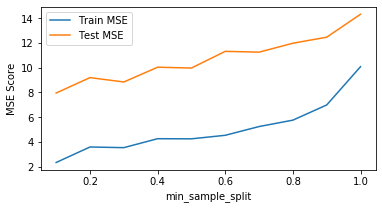

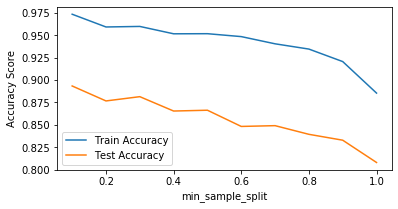

In [9]:
plot_graph(train_mse,test_mse,'min_sample_split','MSE')
plot_graph(train_acc,test_acc,'min_sample_split','Accuracy')

### min_sample_leaf
- min_samples_leaf is The minimum number of samples required to be at a leaf node.
- This similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs.
- Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small.

In [10]:
splits_leaf = np.linspace(.1,0.5,5,endpoint=True)
train_mse = {}
test_mse = {}
train_acc = {}
test_acc = {}
for value in splits_leaf:
    model = GradientBoostingRegressor(min_samples_leaf=value)
    model.fit(X_train,y_train)
    y1 = model.predict(X_train)
    y2 = model.predict(X_test)
    train_acc[value] = model.score(X_train,y_train)
    test_acc[value] = model.score(X_test,y_test)
    train_mse[value] = mean_squared_error(y_train, y1)
    test_mse[value] = mean_squared_error(y_test, y2)

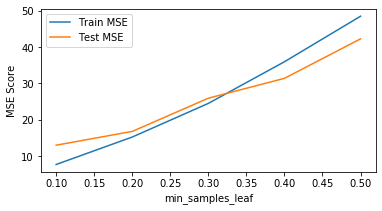

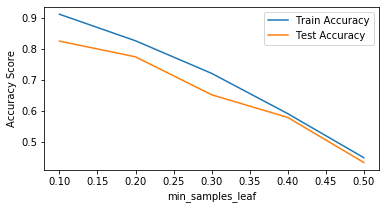

In [11]:
plot_graph(train_mse,test_mse,'min_samples_leaf','MSE')
plot_graph(train_acc,test_acc,'min_samples_leaf','Accuracy')

### max_depth
- This indicates how deep the built tree can be.
- The deeper the tree, the more splits it has and it captures more information about how the data. 
- Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.

In [12]:
depths = np.linspace(1,30,30,endpoint=True)
train_mse = {}
test_mse = {}
train_acc = {}
test_acc = {}
for value in depths:
    model = GradientBoostingRegressor(max_depth=value)
    model.fit(X_train,y_train)
    y1 = model.predict(X_train)
    y2 = model.predict(X_test)
    train_acc[value] = model.score(X_train,y_train)
    test_acc[value] = model.score(X_test,y_test)
    train_mse[value] = mean_squared_error(y_train, y1)
    test_mse[value] = mean_squared_error(y_test, y2)

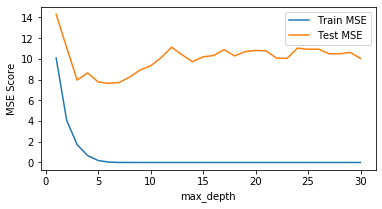

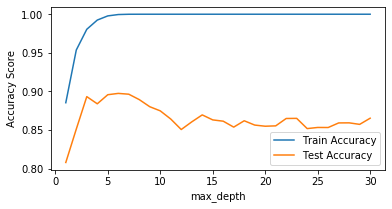

In [13]:
plot_graph(train_mse,test_mse,'max_depth','MSE')
plot_graph(train_acc,test_acc,'max_depth','Accuracy')

### max_features
- max_features represents the number of features to consider when looking for the best split.
- As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number of features.
- Higher values can lead to over-fitting but depends on case to case.

In [14]:
feature = list(range(1,X_train.shape[1]))
feature

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [15]:
train_mse = {}
test_mse = {}
train_acc = {}
test_acc = {}
for value in feature:
    model = GradientBoostingRegressor(max_features=value)
    model.fit(X_train,y_train)
    y1 = model.predict(X_train)
    y2 = model.predict(X_test)
    train_acc[value] = model.score(X_train,y_train)
    test_acc[value] = model.score(X_test,y_test)
    train_mse[value] = mean_squared_error(y_train, y1)
    test_mse[value] = mean_squared_error(y_test, y2)

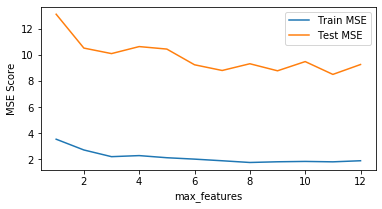

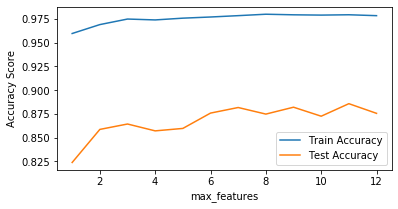

In [16]:
plot_graph(train_mse,test_mse,'max_features','MSE')
plot_graph(train_acc,test_acc,'max_features','Accuracy')

### max_leaf_nodes
- The maximum number of terminal nodes or leaves in a tree.
- Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
- If this is defined, GBM will ignore max_depth.

In [17]:
n_leafs = [10,15,20,30,40,50]

In [18]:
test_mse = {}
train_acc = {}
train_mse = {}
test_acc = {}
for value in n_leafs:
    model = GradientBoostingRegressor(max_leaf_nodes=value)
    model.fit(X_train,y_train)
    y1 = model.predict(X_train)
    y2 = model.predict(X_test)
    train_acc[value] = model.score(X_train,y_train)
    test_acc[value] = model.score(X_test,y_test)
    train_mse[value] = mean_squared_error(y_train, y1)
    test_mse[value] = mean_squared_error(y_test, y2)

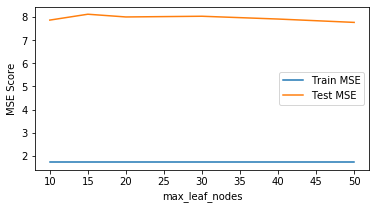

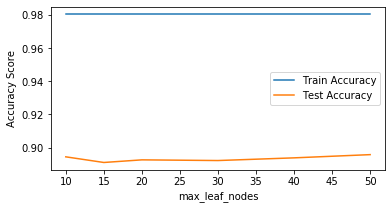

In [19]:
plot_graph(train_mse,test_mse,'max_leaf_nodes','MSE')
plot_graph(train_acc,test_acc,'max_leaf_nodes','Accuracy')

## Boosting Parameters

### learning_rate
- This determines the impact of each tree on the final outcome.
- GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates.
- Lower values are generally preferred as they make the model robust to the specific characteristics of tree and thus allowing it to generalize well.
- Lower values would require higher number of trees to model all the relations and will be computationally expensive.

In [20]:
l_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

In [21]:
test_mse = {}
train_acc = {}
train_mse = {}
test_acc = {}
for value in l_rates:
    model = GradientBoostingRegressor(learning_rate=value)
    model.fit(X_train,y_train)
    y1 = model.predict(X_train)
    y2 = model.predict(X_test)
    train_acc[value] = model.score(X_train,y_train)*100.
    test_acc[value] = model.score(X_test,y_test)*100.
    train_mse[value] = mean_squared_error(y_train, y1)
    test_mse[value] = mean_squared_error(y_test, y2)

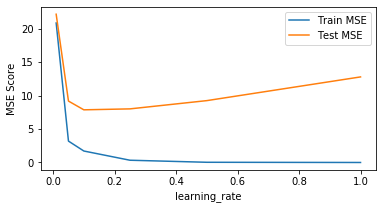

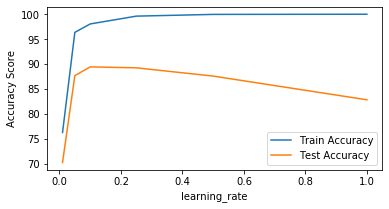

In [22]:
plot_graph(train_mse,test_mse,'learning_rate','MSE')
plot_graph(train_acc,test_acc,'learning_rate','Accuracy')

### n_estimators
- n_estimators represents the number of trees in the forest. 
- Usually the higher the number of trees the better to learn the data.
- However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.

In [34]:
n_values = [5,10,15,20,30,50,80,100,200]
train_mse = {}
test_mse = {}
train_acc = {}
test_acc = {}
for value in n_values:
    model = GradientBoostingRegressor(n_estimators=value)
    model.fit(X_train,y_train)
    y1 = model.predict(X_train)
    y2 = model.predict(X_test)
    train_acc[value] = model.score(X_train,y_train)
    test_acc[value] = model.score(X_test,y_test)
    train_mse[value] = mean_squared_error(y_train, y1)
    test_mse[value] = mean_squared_error(y_test, y2)

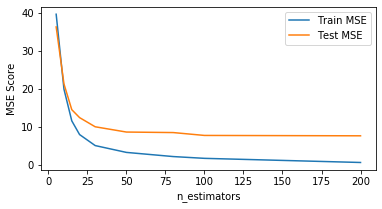

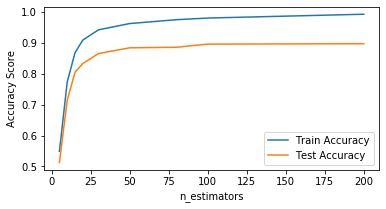

In [35]:
plot_graph(train_mse,test_mse,'n_estimators','MSE')
plot_graph(train_acc,test_acc,'n_estimators','Accuracy')

### subsample
- The fraction of observations to be selected for each tree. Selection is done by random sampling.
- Values slightly less than 1 make the model robust by reducing the variance.
- Typical values ~0.8 generally work fine but can be fine-tuned further.

In [25]:
subsamples = np.linspace(.1,1.,10,endpoint=True)

In [26]:
train_mse = {}
test_mse = {}
train_acc = {}
test_acc = {}
for value in subsamples:
    model = GradientBoostingRegressor(subsample=value)
    model.fit(X_train,y_train)
    y1 = model.predict(X_train)
    y2 = model.predict(X_test)
    train_acc[value] = model.score(X_train,y_train)
    test_acc[value] = model.score(X_test,y_test)
    train_mse[value] = mean_squared_error(y_train, y1)
    test_mse[value] = mean_squared_error(y_test, y2)

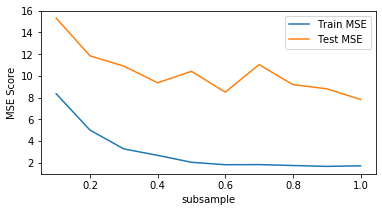

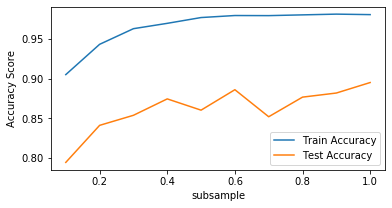

In [27]:
plot_graph(train_mse,test_mse,'subsample','MSE')
plot_graph(train_acc,test_acc,'subsample','Accuracy')

## Other Parameters

### loss
* loss function to be optimized.
    * ‘ls’ refers to least squares regression.
    * ‘lad’ (least absolute deviation) is a highly robust loss function solely based on order information of the input variables.
    * ‘huber’ is a combination of the two. 
    * ‘quantile’ allows quantile regression
* It refers to the loss function to be minimized in each split.
* It can have various values for classification and regression case.
* Generally the default values work fine. Other values should be chosen only if you understand their impact on the mode

In [28]:
losses = ['ls', 'lad', 'huber', 'quantile']

In [29]:
train_mse = {}
test_mse = {}
train_acc = {}
test_acc = {}
for value in losses:
    model = GradientBoostingRegressor(loss=value)
    model.fit(X_train,y_train)
    y1 = model.predict(X_train)
    y2 = model.predict(X_test)
    train_acc[value] = model.score(X_train,y_train)
    test_acc[value] = model.score(X_test,y_test)
    train_mse[value] = mean_squared_error(y_train, y1)
    test_mse[value] = mean_squared_error(y_test, y2)

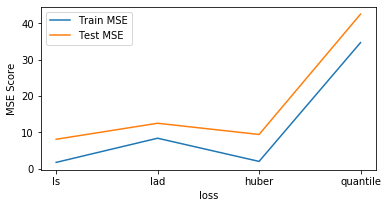

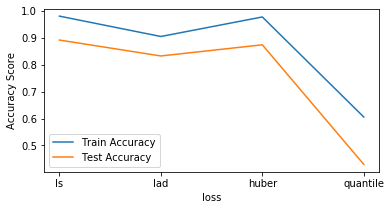

In [30]:
plot_graph(train_mse,test_mse,'loss','MSE')
plot_graph(train_acc,test_acc,'loss','Accuracy')

### criterion
- The function to measure the quality of a split. 
- Supported criteria are “friedman_mse” for the mean squared error with improvement score by Friedman,
- “mse” for mean squared error, and “mae” for the mean absolute error.
- The default value of “friedman_mse” is generally the best as it can provide a better approximation in some cases.

In [36]:
criterion = ['mae','mse']

In [32]:
test_mse = {}
train_acc = {}
train_mse = {}
test_acc = {}
for value in criterion:
    model = GradientBoostingRegressor(criterion=value)
    model.fit(X_train,y_train)
    y1 = model.predict(X_train)
    y2 = model.predict(X_test)
    train_acc[value] = model.score(X_train,y_train)
    test_acc[value] = model.score(X_test,y_test)
    train_mse[value] = mean_squared_error(y_train, y1)
    test_mse[value] = mean_squared_error(y_test, y2)

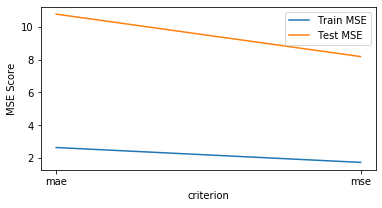

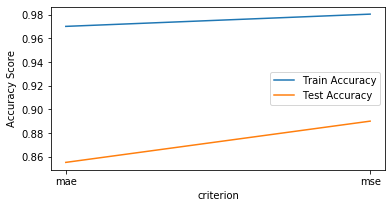

In [33]:
plot_graph(train_mse,test_mse,'criterion','MSE')
plot_graph(train_acc,test_acc,'criterion','Accuracy')